In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.naive_bayes import GaussianNB, MultinomialNB#高斯贝叶斯和多项式朴素贝叶斯
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [18]:
# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature_C = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
features = [2,3]

In [19]:
## 读取数据
path = './datas/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x = data[list(range(4))]
x = x[features]
y = pd.Categorical(data[4]).codes ## 直接将数据特征转换为0，1,2
print ("总样本数目：%d；特征属性数目：%d" % x.shape)

总样本数目：150；特征属性数目：2


In [20]:
## 0. 数据分割，形成模型训练数据和测试数据
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：120, 测试数据集样本数目：30


In [21]:
## 高斯贝叶斯模型构建
clf = Pipeline([
        ('sc', StandardScaler()),#标准化，把它转化成了高斯分布, 特征取值存在负数
        ('poly', PolynomialFeatures(degree=4)),
        ('clf', MultinomialNB())]) # MultinomialNB多项式贝叶斯算法中要求特征属性的取值不能为负数
## 训练模型
clf.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [22]:
## 计算预测值并计算准确率
y_train_hat = clf.predict(x_train)
print ('训练集准确度: %.2f%%' % (100 * accuracy_score(y_train, y_train_hat)))
y_test_hat = clf.predict(x_test)
print ('测试集准确度：%.2f%%' % (100 * accuracy_score(y_test, y_test_hat)))


训练集准确度: 95.00%
测试集准确度：100.00%


In [23]:
## 产生区域图
N, M = 500, 500     # 横纵各采样多少个值
x1_min1, x2_min1 = x_train.min()
x1_max1, x2_max1 = x_train.max()
x1_min2, x2_min2 = x_test.min()
x1_max2, x2_max2 = x_test.max()
x1_min = np.min((x1_min1, x1_min2))
x1_max = np.max((x1_max1, x1_max2))
x2_min = np.min((x2_min1, x2_min2))
x2_max = np.max((x2_max1, x2_max2))

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = clf.predict(x_show)                  # 预测值
y_show_hat = y_show_hat.reshape(x1.shape)

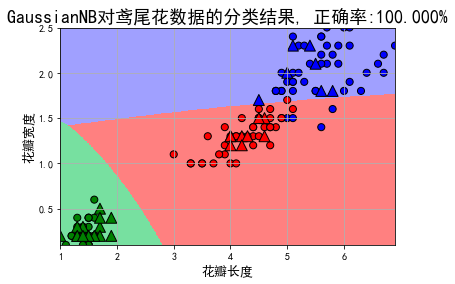

In [24]:
## 画图
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x_train[features[0]], x_train[features[1]], c=y_train, edgecolors='k', s=50, cmap=cm_dark)
plt.scatter(x_test[features[0]], x_test[features[1]], c=y_test, marker='^', edgecolors='k', s=120, cmap=cm_dark)
plt.xlabel(iris_feature_C[features[0]], fontsize=13)
plt.ylabel(iris_feature_C[features[1]], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'GaussianNB对鸢尾花数据的分类结果, 正确率:%.3f%%' % (100 * accuracy_score(y_test, y_test_hat)), fontsize=18)
plt.grid(True)
plt.show()